In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
depth = xr.open_dataset('D:/MScData/depth_res.nc')
od = ospy.OceanDataset(depth)
depth = depth['Depth']

In [3]:
depth = depth.where(depth>0,np.nan)
depth_r = depth.rolling(X=10, center=True).mean()
depth_r = depth.rolling(Y=10, center=True).mean()

In [4]:
north_zonal = depth.sel(Y=78.5,method='nearest').sel(X=slice(-20,11)).dropna(dim="X")
north_zonal_moor = depth.sel(Y=78.5,method='nearest').sel(X=slice(0.3,8)).dropna(dim="X")


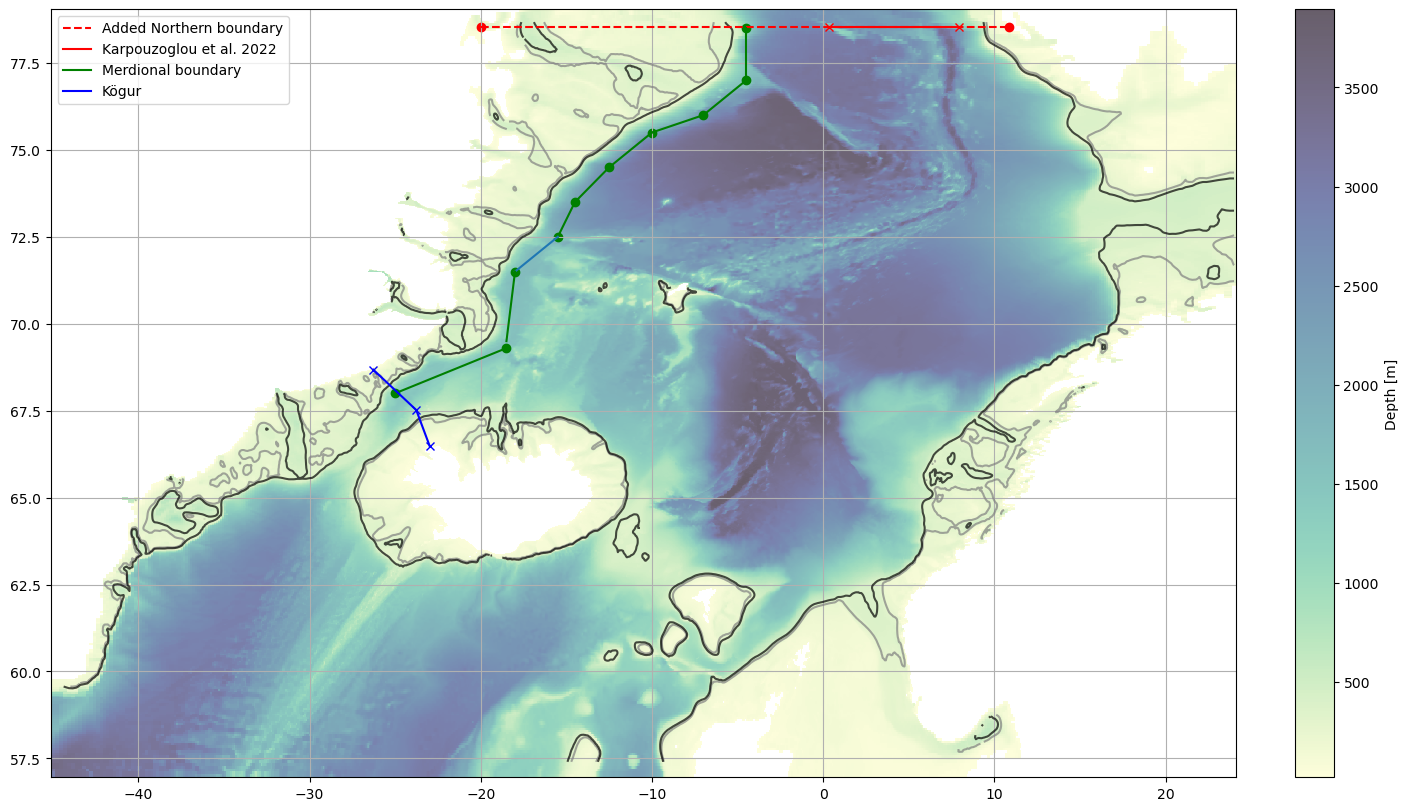

In [5]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')

# Meridional Section
ax.scatter(-4.5,78.5,color='g')
ax.scatter(-4.5,77,color='g')
ax.plot([-4.5,-4.5],[78.5,77],color='g',label='Merdional boundary')
ax.scatter(-7,76,color='g')
ax.plot([-4.5,-7],[77,76],'g')
ax.scatter(-10,75.5,color='g')
ax.plot([-7,-10],[76,75.5],'g')
ax.scatter(-12.5,74.5,color='g')
ax.plot([-10,-12.5],[75.5,74.5],'g')
ax.scatter(-14.5,73.5,color='g')
ax.plot([-12.5,-14.5],[74.5,73.5],'g')
ax.scatter(-15.5,72.5,color='g')
ax.plot([-14.5,-15.5],[73.5,72.5],'g')
ax.scatter(-18,71.5,color='g')
ax.plot([-15.5,-18],[72.5,71.5])
ax.scatter(-18.5,69.3,color='g')
ax.plot([-18,-18.5],[71.5,69.5],'g')
ax.scatter(-25,68,color='g')
ax.plot([-18.5,-25],[69.3,68],'g')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()

In [6]:
# coords = depth.sel(X=slice(-30,-22)).sel(Y=slice(65,70))
# fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
# mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Depth [m]')
# ax.grid()

# ax.set_xlim(coords.X[0],coords.X[-1])
# ax.set_ylim(coords.Y[0],coords.Y[-1])

In [7]:
# DS_section = od.subsample.mooring_array(Ymoor=[66,69],Xmoor=[-24,-25.5])

In [8]:
depth_s = xr.open_dataset('D:/MScData/depth_res.nc')['Depth']
# Add nan where depth = 0
depth_s = depth.where(depth>0,np.nan)

# Smooth the data with rolling of window size 9 in both lat/lon direction
depth_s = depth_s.rolling(X=5, center=True).mean().rolling(Y=5, center=True).mean()

# Selecting spesific domain and removing outliers
depth_s = depth_s.sel(Y=slice(67.5,78.5)).sel(X=slice(-26,-5))
condition = ((-20<=depth_s.X) & (depth_s.X<=-9)) & ((77<=depth_s.Y) & (depth_s.Y<=78.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-20<=depth_s.X) & (depth_s.X<=-15)) & ((75<=depth_s.Y) & (depth_s.Y<=77.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-15<=depth_s.X) & (depth_s.X<=0)) & ((70<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=np.nan)
condition = ((-30<=depth_s.X) & (depth_s.X<=-18)) & ((73<=depth_s.Y) & (depth_s.Y<=75))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((72<=depth_s.Y) & (depth_s.Y<=73))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((71.5<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20.5)) & ((69.5<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-25<=depth_s.X) & (depth_s.X<=-15)) & ((67<=depth_s.Y) & (depth_s.Y<=68))
depth_s = depth_s.where(~condition, other=np.nan)
condition = ((-22<=depth_s.X) & (depth_s.X<=-20.5)) & ((69.25<=depth_s.Y) & (depth_s.Y<=69.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-25<=depth_s.X) & (depth_s.X<=-24)) & ((68.75<=depth_s.Y) & (depth_s.Y<=69.25))
depth_s = depth_s.where(~condition, other=0)
condition = ((-21.25<=depth_s.X) & (depth_s.X<=-21)) & ((69.2<=depth_s.Y) & (depth_s.Y<=69.25))
depth_s = depth_s.where(~condition, other=0)


# Adjust mask for small tolerance around the desired range
desired_lower = 395
desired_upper = 405
tolerance = 0.01  # Adjust as necessary based on actual distribution seen

mask = (depth_s > desired_lower - tolerance) & (depth_s < desired_upper + tolerance)

# Drop NaNs
positions = mask.where(mask, drop=True)

# Verify mask summary
print("\nMask Summary (True values count) after adding tolerance:", np.sum(mask.values))


# Extract coordinates of the matching positions
coordinates = []
for y_coord in positions['Y'].values:
    for x_coord in positions['X'].values:
        if mask.sel(Y=y_coord, X=x_coord).values:
            coordinates.append((x_coord, y_coord))



Mask Summary (True values count) after adding tolerance: 158


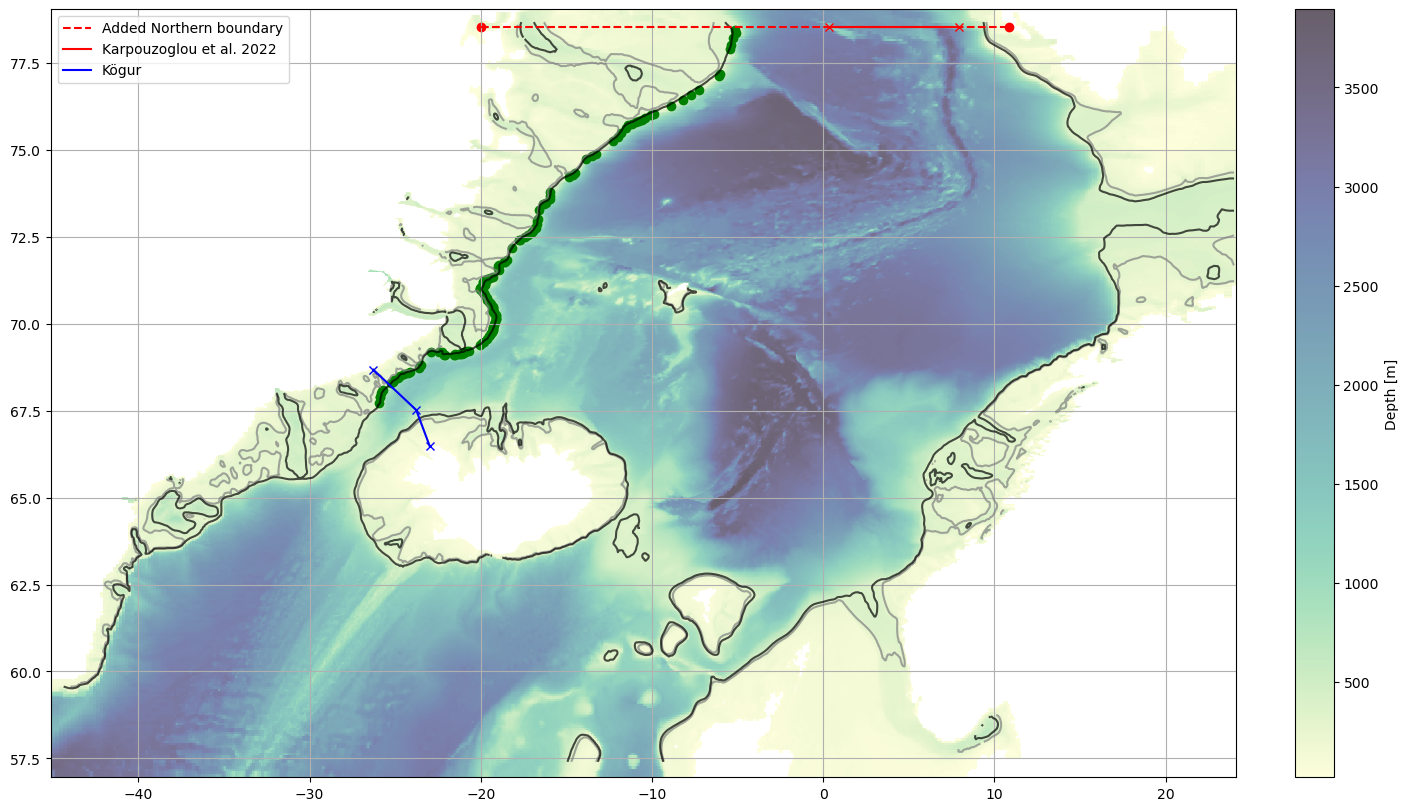

In [9]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')

# Meridional Section
for i in coordinates:
    ax.scatter(i[0],i[1],color='g')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()

In [10]:
import gsw
shelfLocation = []
distance = []
for i in coordinates:
    shelfLocation.append((i[0],i[1]))
for i in range(1,len(shelfLocation)):
        distance.append(gsw.distance([shelfLocation[i-1][0],shelfLocation[i][0]],[shelfLocation[i-1][1],shelfLocation[i][1]])[0])

display(np.mean(distance))

11265.12547146942

In [11]:
import gsw
shelfLocation = []

for i in coordinates:
    shelfLocation.append((i[0],i[1]))

data = [shelfLocation[0]]
shelfLocation.remove(shelfLocation[0])
while len(shelfLocation) !=0:
    print(len(shelfLocation))
    distance = []
    for i in range(len(shelfLocation)):
        distance.append(gsw.distance([data[-1][0],shelfLocation[i][0]],[data[-1][1],shelfLocation[i][1]]))
    if distance[0] < 20000:
        shelfLocation.remove(shelfLocation[0])
        continue
    loc = np.argmin(distance)
    data.append(shelfLocation[loc])
    shelfLocation.remove(shelfLocation[loc])

shelfLocation = data

with open("shelfLocation.txt",'w') as f:
    for step in range(len(shelfLocation)):
        if step != len(shelfLocation)-1:
            f.write(str(shelfLocation[step])+',')
        else:
            f.write(str(shelfLocation[step]))

157
156
155
154
153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [12]:
import ast
with open("shelfLocation.txt",'r') as f:
        data = f.read()
        shelfLocation = ast.literal_eval(data)

In [13]:
display(shelfLocation)

((-25.945269405, 67.72182567499998),
 (-25.879215025, 67.90230477999997),
 (-25.68238598, 68.08266394500002),
 (-25.230624110000008, 68.29322681499998),
 (-24.851339610000004, 68.443908915),
 (-24.478951290000005, 68.564722365),
 (-23.634781839999995, 68.73136267499997),
 (-22.936218755, 69.1902753),
 (-22.425941379999998, 69.17484634499999),
 (-22.258270824999997, 69.1902753),
 (-21.544723465000004, 69.11323352999997),
 (-21.009222945000005, 69.15942783999999),
 (-20.071466275000006, 69.376292805),
 (-19.613957790000008, 69.56410273999997),
 (-19.362780585000003, 69.75398491499995),
 (-19.21305323, 69.97853104999992),
 (-19.113631660000003, 70.15755301),
 (-19.26288235, 70.339145865),
 (-19.362780585000003, 70.52359647499999),
 (-19.613957790000008, 70.69401962499998),
 (-19.81641790500001, 70.867314085),
 (-19.96917868500001, 71.04375456000001),
 (-19.81641790500001, 71.22364068499999),
 (-19.312791245, 71.35178564499999),
 (-18.915716895000003, 71.55718772499998),
 (-18.670011440000

In [14]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import alphashape

# Create an alpha shape (concave hull) around the points
alpha_shape = alphashape.alphashape(shelfLocation, alpha=0.1)

# Create a GeoDataFrame from the alpha shape
gdf_alpha = gpd.GeoDataFrame(geometry=[alpha_shape], crs="EPSG:4326")

# Reproject to a suitable projected CRS (e.g., UTM zone 32N, EPSG:32632)
gdf_alpha_projected = gdf_alpha.to_crs(epsg=32632)

# Create a buffer around the alpha shape with a radius of 100000 meters (100 km)
gdf_alpha_projected['buffer'] = gdf_alpha_projected.geometry.buffer(100000)

# Reproject the buffered geometries back to the original geographic CRS
gdf_alpha['buffer'] = gdf_alpha_projected['buffer'].to_crs(epsg=4326)


C:\Users\eirik\AppData\Local\Temp\ipykernel_368\4226216732.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


(65.0, 79.0)

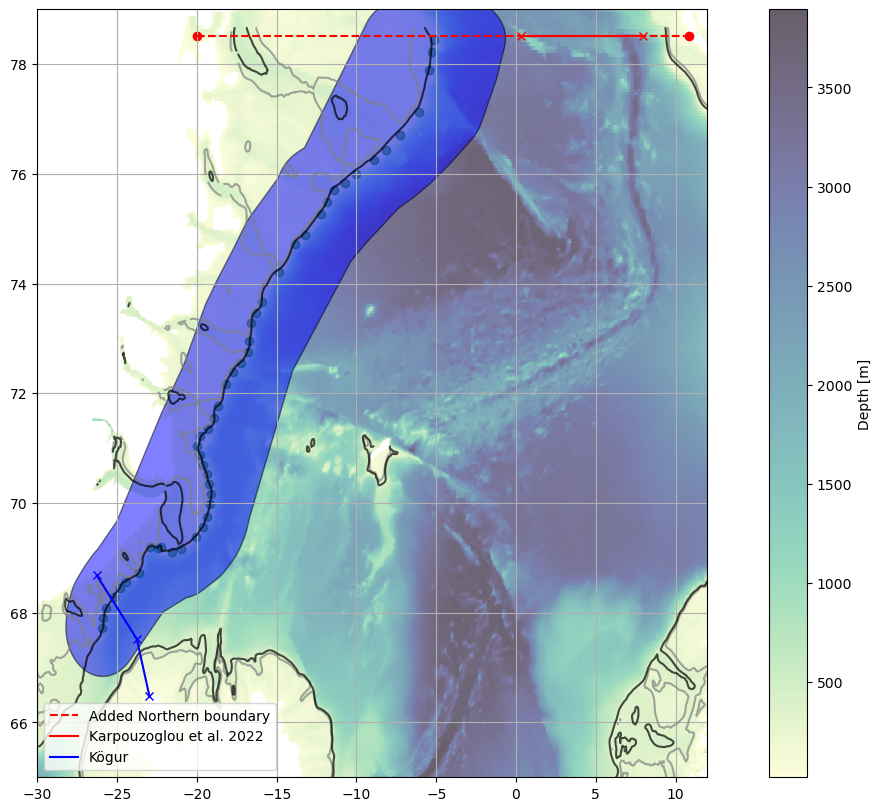

In [15]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')


# Meridional Section
for i in shelfLocation:
    ax.scatter(i[0],i[1],color='g', alpha=0.5)
gdf_alpha['buffer'].plot(ax=ax, color='blue', alpha=0.5, edgecolor='k',label='100km distance from shelfbreak')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()
ax.set_xlim(-30,12)
ax.set_ylim(65,79)

C:\Users\eirik\AppData\Local\Temp\ipykernel_368\222104228.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour = depth.plot.contour(levels=[contour_depth], add_colorbar=False).collections[0].get_paths()


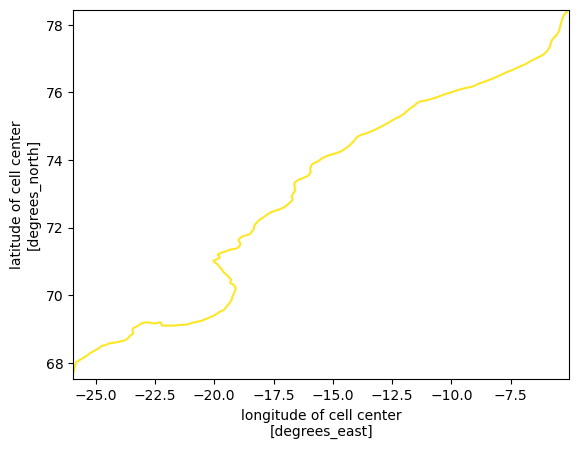

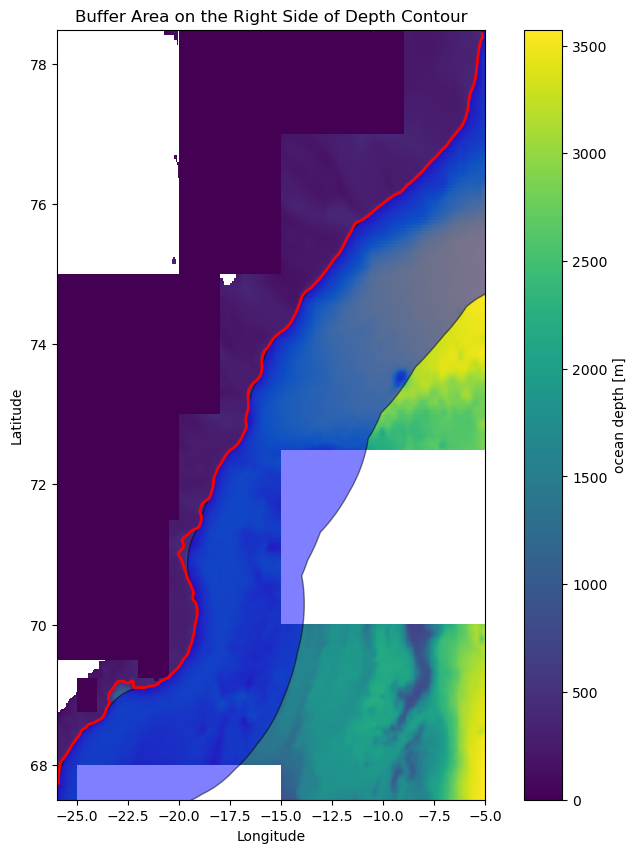

In [16]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import LineString, Polygon
import matplotlib.pyplot as plt
import numpy as np

# Load the bathymetry data (replace 'bathymetry.nc' with your file)
# Assume the dataset has variables 'longitude', 'latitude', and 'depth'

# Extract the depth data
depth = depth_s

# Define the depth contour to extract (e.g., -200 meters)
contour_depth = 400

# Extract the contour line for the specified depth
contour = depth.plot.contour(levels=[contour_depth], add_colorbar=False).collections[0].get_paths()

# Convert the contour line to a shapely LineString
contour_lines = []
for path in contour:
    v = path.vertices
    contour_lines.append(LineString(v))

# Create a GeoDataFrame from the contour lines
gdf_contour = gpd.GeoDataFrame(geometry=contour_lines, crs="EPSG:4326")

# Reproject to a suitable projected CRS (e.g., UTM zone 32N, EPSG:32632)
gdf_contour_projected = gdf_contour.to_crs(epsg=32632)

# Function to reverse the line orientation
def reverse_line(line):
    return LineString(line.coords[::-1])

# Reverse the line orientation if needed
gdf_contour_projected['geometry'] = gdf_contour_projected.geometry.apply(reverse_line)

# Create an offset line on the right side of the contour line
# Positive distance for right side, negative for left side
offset_distance = 100000  # 100000 meters
offset_lines = gdf_contour_projected.geometry.apply(lambda geom: geom.parallel_offset(offset_distance, 'right'))

# Buffer the offset line to create the desired area
buffer = offset_lines.buffer(abs(offset_distance))

# Reproject the buffer back to the original geographic CRS
buffer = buffer.to_crs(epsg=4326)

gdf_buffer = gpd.GeoDataFrame(geometry=buffer, crs="EPSG:4326")

# Plot the bathymetry data, the contour line, and the buffer area
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bathymetry data
depth.plot(ax=ax, cmap='viridis', add_colorbar=True)

# Plot the buffer area
gpd.GeoDataFrame(geometry=buffer).plot(ax=ax, color='blue', alpha=0.5, edgecolor='k')

# Plot the contour line
gdf_contour.plot(ax=ax, color='red', linewidth=2)

# Set plot title and labels
ax.set_title('Buffer Area on the Right Side of Depth Contour')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

(65.0, 79.0)

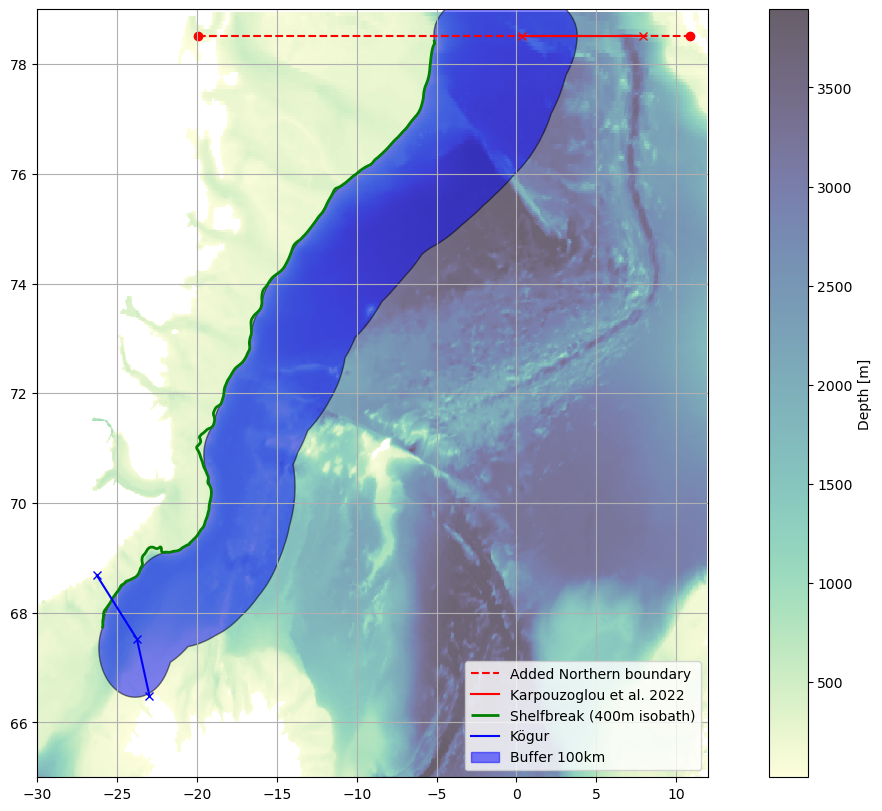

In [17]:
import matplotlib.patches as mpatches

depth = xr.open_dataset('D:/MScData/depth_res.nc')['Depth'].sel(Y=slice(65,79)).sel(X=slice(-30,12))
depth = depth.where(depth>0,np.nan)

fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
ax.contour(depth.X,depth.Y,depth,[0],colors='black')
# ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',linestyles='--',alpha=0.7)
# ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',linestyles='--',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')


# Meridional Section
gdf_contour.plot(ax=ax, color='green', linewidth=2, label='Shelfbreak (400m isobath)')
# Manually add buffer polygons to the plot with a label
for geom in buffer:
    if geom.geom_type == 'Polygon':
        poly = mpatches.Polygon(list(geom.exterior.coords), closed=True, facecolor='blue', edgecolor='k', alpha=0.5)
        ax.add_patch(poly)
    elif geom.geom_type == 'MultiPolygon':
        for subgeom in geom:
            poly = mpatches.Polygon(list(subgeom.exterior.coords), closed=True, facecolor='blue', edgecolor='k', alpha=0.5)
            ax.add_patch(poly)

# Add a dummy patch for the buffer to include it in the legend
buffer_patch = mpatches.Patch(color='blue', alpha=0.5, label='Buffer 100km')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur, lats_Kogur, 'bx')
ax.plot(lons_Kogur, lats_Kogur, 'b', label='Kögur')

# Collect all handles and labels
handles, labels = ax.get_legend_handles_labels()
handles.append(buffer_patch)

# Add the legend
ax.legend(handles=handles)

ax.set_xlim(-30, 12)
ax.set_ylim(65, 79)

In [36]:
# Assuming buffer is your GeoDataFrame with buffer polygons

# List to store the coordinates
buffer_coordinates = []

# Loop through each geometry in the GeoDataFrame
for geom in buffer.geometry:
    if geom.geom_type == 'Polygon':
        coords = list(geom.exterior.coords)
        buffer_coordinates.append(coords)
    elif geom.geom_type == 'MultiPolygon':
        for subgeom in geom:
            coords = list(subgeom.exterior.coords)
            buffer_coordinates.append(coords)

extendedShelf = []
for lon, lat in buffer_coordinates[0]:
    extendedShelf.append((lon,lat))

# List to store the coordinates
contour_coordinates = []

# Loop through each geometry in the GeoDataFrame
for geom in gdf_contour.geometry:
    if geom.geom_type == 'LineString':
        coords = list(geom.coords)
        contour_coordinates.append(coords)
    elif geom.geom_type == 'MultiLineString':
        for subgeom in geom:
            coords = list(subgeom.coords)
            contour_coordinates.append(coords)

shelfLocation = []
for lon, lat in contour_coordinates[0]:
    shelfLocation.append((lon,lat))

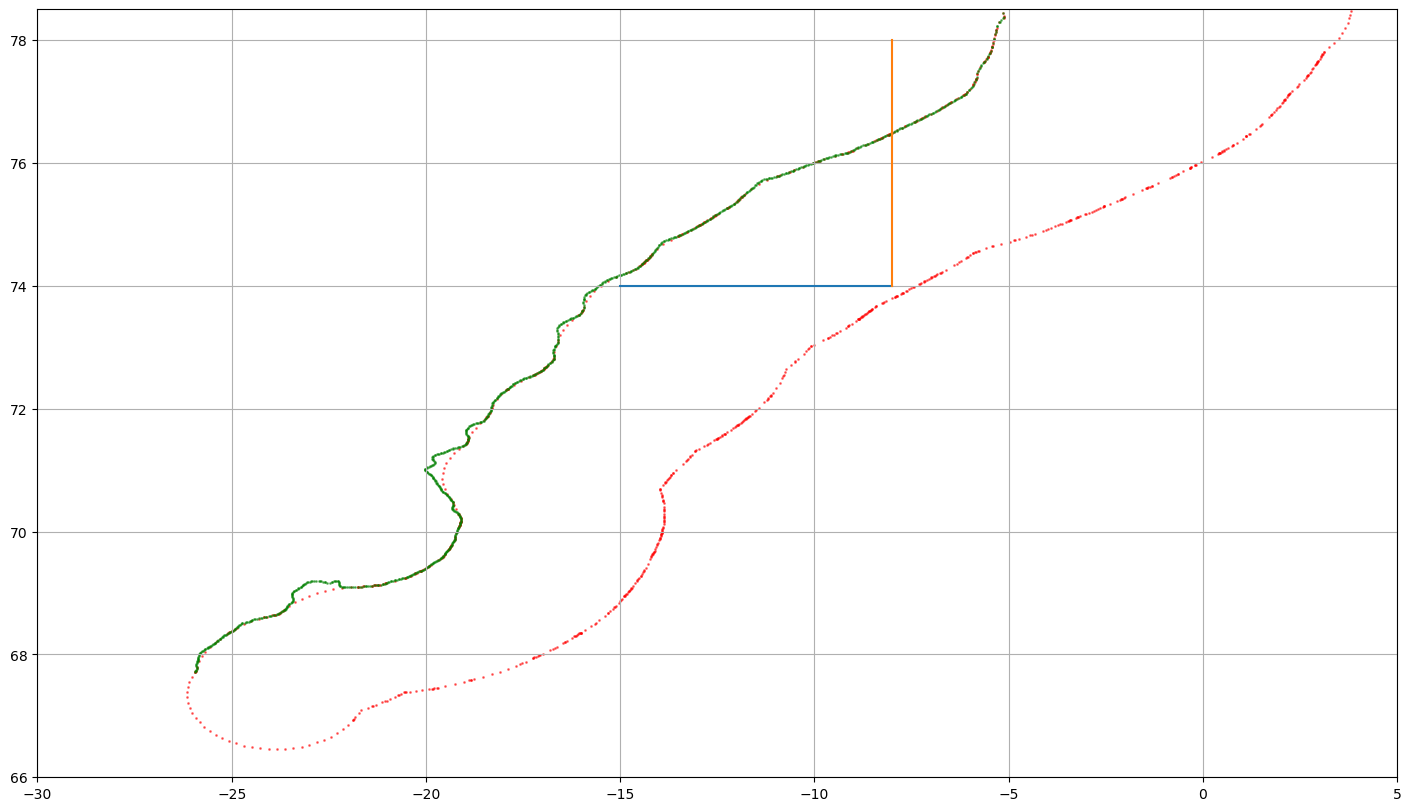

In [61]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
for lon, lat in extendedShelf:
    ax.scatter(lon,lat,color='red',s=1,alpha=0.5)
for lon, lat in shelfLocation:
    ax.scatter(lon,lat,color='green',s=1,alpha=0.5)

ax.grid()
ax.set_xlim(-30,5)
ax.set_ylim(66,78.5)

ax.plot([-15,-8],[74,74])
ax.plot([-8,-8],[74,78])

In [62]:
coordsExtendedShelf = []
for lon, lat in extendedShelf:
    condition = ((((lon>-30)&(lon<-20))&((lat<=66.8))) | ((lon<=-23)&((lat>66.8)&(lat<=69.5))) | ((lon<=-15)&((lat>=68.9)&(lat<=76))) | ((lon<=-8)&(lat>=74)) | ((lon<-2)&(lat>=76)) | (lat>=78.5))
    if condition:
        pass
    else:
        coordsExtendedShelf.append((lon,lat))

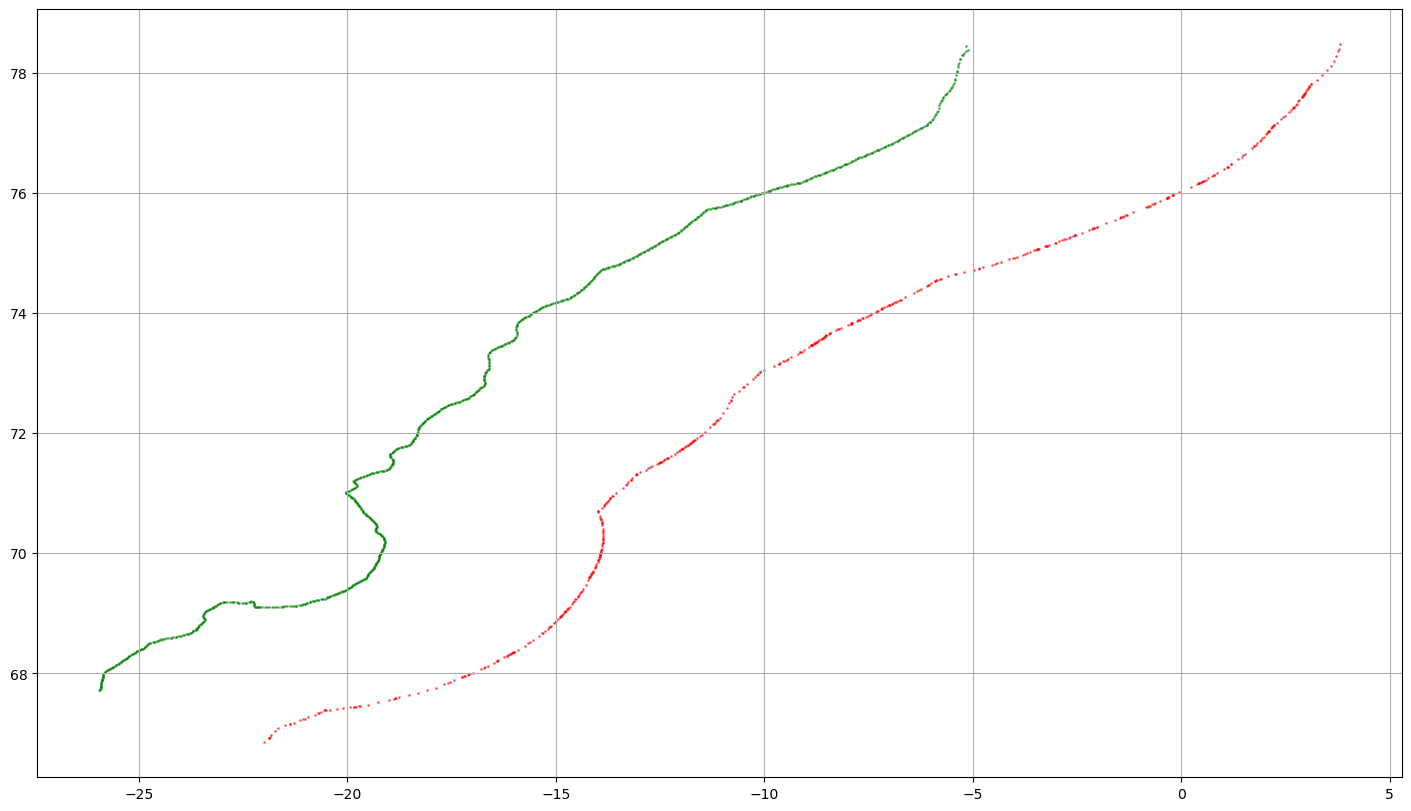

In [63]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
for lon, lat in coordsExtendedShelf:
    ax.scatter(lon,lat,color='red',s=1,alpha=0.5)
for lon, lat in shelfLocation:
    ax.scatter(lon,lat,color='green',s=1,alpha=0.5)

ax.grid()
# ax.set_xlim(-30,5)
# ax.set_ylim(66,78.5)